<a href="https://colab.research.google.com/github/karthikbappudi/Stock_Prediction/blob/master/Stockpredicitiong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock prediction**



create a renforcement learning for predicitng stocks


define agent algoritm 
make prediction
plot prediction

  

*  import dependencies
*  import datasets
*   define agent algoritm
*   make predictions

*   plot predictions







In [0]:
# matrix opp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import pandas_datareader as dr

**Importing Data**

get_data_yahoo will get data of stocks from yahoo finanace. The arguments are 

1.   Company code name
2.   start date in the form of a time stamp using datetime package of python
3.   End date 

The data is dtored in the form of pandas dataframe. You can also import data using other methods like quandal 





In [0]:
apple_stocks = dr.get_data_yahoo('AAPL',start=datetime.datetime(2010,1,1),end = datetime.datetime(2019,8,1))


**Exploratary Data Analysis**

Here I am doing some basic financial data exploration. I will add all the functionalities of the code in the comments

In [5]:
# First we will have a look at the data

apple_stocks.head(), apple_stocks.tail() # head is used to see first 5 rows of the data & tail is used to see lsat 5 rows

(                 High        Low       Open      Close       Volume  Adj Close
 Date                                                                          
 2010-01-04  30.642857  30.340000  30.490000  30.572857  123432400.0  26.681330
 2010-01-05  30.798571  30.464285  30.657143  30.625713  150476200.0  26.727465
 2010-01-06  30.747143  30.107143  30.625713  30.138571  138040000.0  26.302330
 2010-01-07  30.285715  29.864286  30.250000  30.082857  119282800.0  26.253704
 2010-01-08  30.285715  29.865715  30.042856  30.282858  111902700.0  26.428249,
                   High         Low  ...      Volume   Adj Close
 Date                                ...                        
 2019-07-26  209.729996  207.139999  ...  17618900.0  206.953690
 2019-07-29  210.639999  208.440002  ...  21673400.0  208.886337
 2019-07-30  210.160004  207.309998  ...  33935700.0  207.989746
 2019-07-31  221.369995  211.300003  ...  69281400.0  212.233627
 2019-08-01  218.029999  206.740005  ...  5401790

In [8]:
# for detailed analysis have a look at desccice 
apple_stocks.index # index function give indesxes of the rows in out case it is a datatime stamp since we are working with time series data


DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2019-07-19', '2019-07-22', '2019-07-23', '2019-07-24',
               '2019-07-25', '2019-07-26', '2019-07-29', '2019-07-30',
               '2019-07-31', '2019-08-01'],
              dtype='datetime64[ns]', name='Date', length=2411, freq=None)

In [9]:
apple_stocks.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

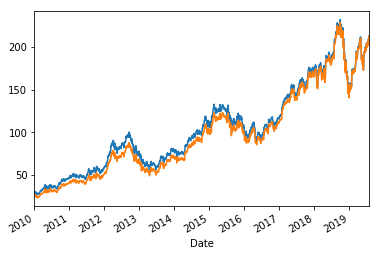

In [11]:
# We want to predict the closing price of the a company. We will plot clsing price of apple stocks
apple_stocks['Close'].plot()
apple_stocks['Adj Close'].plot()


In [0]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (dr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2010, 1, 1), datetime.datetime(2019, 8, 1))

In [15]:
all_data.index

MultiIndex(levels=[['AAPL', 'MSFT', 'IBM', 'GOOG'], [2010-01-04 00:00:00, 2010-01-05 00:00:00, 2010-01-06 00:00:00, 2010-01-07 00:00:00, 2010-01-08 00:00:00, 2010-01-11 00:00:00, 2010-01-12 00:00:00, 2010-01-13 00:00:00, 2010-01-14 00:00:00, 2010-01-15 00:00:00, 2010-01-19 00:00:00, 2010-01-20 00:00:00, 2010-01-21 00:00:00, 2010-01-22 00:00:00, 2010-01-25 00:00:00, 2010-01-26 00:00:00, 2010-01-27 00:00:00, 2010-01-28 00:00:00, 2010-01-29 00:00:00, 2010-02-01 00:00:00, 2010-02-02 00:00:00, 2010-02-03 00:00:00, 2010-02-04 00:00:00, 2010-02-05 00:00:00, 2010-02-08 00:00:00, 2010-02-09 00:00:00, 2010-02-10 00:00:00, 2010-02-11 00:00:00, 2010-02-12 00:00:00, 2010-02-16 00:00:00, 2010-02-17 00:00:00, 2010-02-18 00:00:00, 2010-02-19 00:00:00, 2010-02-22 00:00:00, 2010-02-23 00:00:00, 2010-02-24 00:00:00, 2010-02-25 00:00:00, 2010-02-26 00:00:00, 2010-03-01 00:00:00, 2010-03-02 00:00:00, 2010-03-03 00:00:00, 2010-03-04 00:00:00, 2010-03-05 00:00:00, 2010-03-08 00:00:00, 2010-03-09 00:00:00, 20

In [0]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')


In [19]:
daily_close_px.head()

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,26.681330,312.204773,98.142967,24.443624
2010-01-05,26.727465,310.829926,96.957375,24.451517
2010-01-06,26.302330,302.994293,96.327530,24.301458
2010-01-07,26.253704,295.940735,95.994110,24.048725
2010-01-08,26.428249,299.885956,96.957375,24.214581
